<a href="https://colab.research.google.com/github/OmarFarukNoman/Into-to-Machine-Learning/blob/main/Homework-3/Problem_2b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Evaluation Metrics:
Accuracy: 0.9737
Precision: 0.9706
Recall: 0.9851
F1 Score: 0.9778

Confusion Matrix Values:
True Negatives (TN):  45
False Positives (FP): 2
False Negatives (FN): 1
True Positives (TP):  66


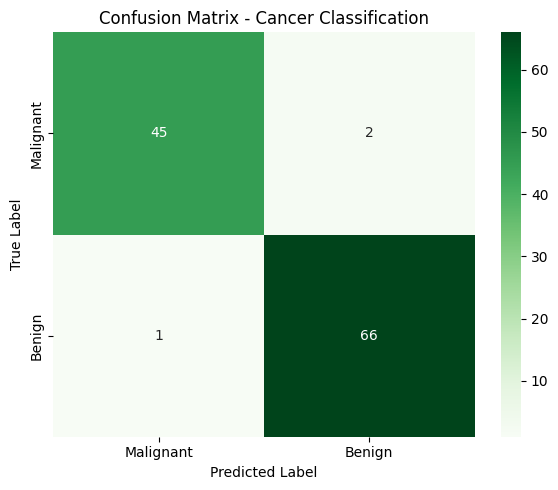

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# For this homework, we're using cancer dataset which can be directly called from sklearn library
cancer = load_breast_cancer(as_frame=True)
df_cancer = cancer.frame

# I've separated input features and target.
X_in = df_cancer.drop('target', axis=1)
y_out = df_cancer['target']

# I've splited the data into 80/20 (training/validation)
X_train, X_test, y_train, y_test = train_test_split(X_in, y_out, test_size=0.2, random_state=0)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Regularization strength is inverse of C. That means Larger regularization_strength = stronger regularization
regularization_strength = 10
logreg = LogisticRegression(random_state=0, max_iter=1200, penalty='l1', C=1/regularization_strength, solver='liblinear')
logreg.fit(X_train_scaled, y_train)

# Prediction
y_pred = logreg.predict(X_test_scaled)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Results
print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion matrix values
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix Values:")
print(f"True Negatives (TN):  {cm[0, 0]}")
print(f"False Positives (FP): {cm[0, 1]}")
print(f"False Negatives (FN): {cm[1, 0]}")
print(f"True Positives (TP):  {cm[1, 1]}")

# Confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Malignant', 'Benign'],
            yticklabels=['Malignant', 'Benign'])
plt.title('Confusion Matrix - Cancer Classification')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()